In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [11]:
df = pd.read_csv("Dataset for ML.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41339 entries, 0 to 41338
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Business Tag              41339 non-null  object 
 1   Company Name              41328 non-null  object 
 2   Company ID                41339 non-null  int64  
 3   Country                   40970 non-null  object 
 4   Founding Year             40488 non-null  float64
 5   Stage                     41339 non-null  object 
 6   Number of Funding Rounds  41338 non-null  float64
 7   Last Funding Type         41299 non-null  object 
 8   Last Funding Date         41338 non-null  object 
 9   Last Funding Year         41338 non-null  float64
 10  Last Funding Total        40869 non-null  float64
 11  Customer Type             38613 non-null  object 
 12  Industry Tags             41339 non-null  object 
 13  Technology Tags           32005 non-null  object 
 14  Compan

In [12]:
#Data Cleaning Process

df['Founding Year '] = pd.to_numeric(df['Founding Year '], errors='coerce')

df.columns = df.columns.str.strip()

df['Founding Year'].fillna(df['Founding Year'].median(), inplace=True)

In [13]:
#Imputation 


# Numerical Features
numerical_cols = ['Funding Total', 'Funding per Employee', 'Number of Funding Rounds','Headcount','Last Funding Total']
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Categorical Features
categorical_cols = ['Customer Type', 'Industry Tags', 'Last Funding Type','Country','Company Name']
for col in categorical_cols:
    df[col].fillna('Unknown', inplace=True)

# Date Features
#date_cols = ['Last Funding Date', 'Last Funding Year']
#for col in date_cols:
 #   df[col].fillna(method='ffill', inplace=True)  # Or use median for year if numeric

# Drop High-Null Columns
high_null_cols = ['Technology Tags']
df.drop(columns=high_null_cols, inplace=True)

# Verify null values
print(df.isnull().sum())

Business Tag                0
Company Name                0
Company ID                  0
Country                     0
Founding Year               0
Stage                       0
Number of Funding Rounds    0
Last Funding Type           0
Last Funding Date           1
Last Funding Year           1
Last Funding Total          0
Customer Type               0
Industry Tags               0
Company Type                0
Funding Total               0
Headcount                   0
Funding per Employee        0
dtype: int64


In [17]:
df_cleaned = df.dropna()

columns_to_drop = ['Last Funding Date', 'Company Name', 'Company ID','Last Funding Type']

new_clean_data = df_cleaned.drop(columns=columns_to_drop)

In [18]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# 1. Load and preprocess data
X = new_clean_data.drop(columns=['Stage'])  # Features
y = (new_clean_data['Stage'] == 'Growth Stage').astype(int)  # Binary target variable

# Encode categorical features if necessary
X = pd.get_dummies(X, drop_first=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Train models
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_probs = rf_model.predict_proba(X_test)[:, 1]

# Decision Tree
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)
dt_probs = dt_model.predict_proba(X_test)[:, 1]

# 3. Evaluate models using AUC
rf_auc = roc_auc_score(y_test, rf_probs)
dt_auc = roc_auc_score(y_test, dt_probs)

# 4. Print results
print(f"Random Forest AUC: {rf_auc:.4f}")
print(f"Decision Tree AUC: {dt_auc:.4f}")

Random Forest AUC: 0.8763
Decision Tree AUC: 0.8452


In [19]:
# 5. Get feature importances from the Random Forest model
feature_importances = rf_model.feature_importances_

# 6. Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# 7. Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 8. Print the top 20 most important features
print("\nTop 20 Most Important Features:")
print(feature_importance_df.head(20))


Top 20 Most Important Features:
                                               Feature  Importance
4                                        Funding Total    0.208917
3                                   Last Funding Total    0.136749
5                                            Headcount    0.105233
6                                 Funding per Employee    0.096103
0                                        Founding Year    0.090198
1                             Number of Funding Rounds    0.071774
2                                    Last Funding Year    0.059783
184                       Customer Type_Consumer (B2C)    0.009655
71                                       Country_China    0.009654
41                               Business Tag_Service     0.009338
177                              Country_United States    0.009219
13                        Business Tag_Business (B2B)     0.007136
190  Industry Tags_Communications and information t...    0.007136
201           Industry Tags_L

In [20]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression model
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

# Predict probabilities
lr_probs = lr_model.predict_proba(X_test)[:, 1]

# Evaluate AUC
lr_auc = roc_auc_score(y_test, lr_probs)
print(f"Logistic Regression AUC: {lr_auc:.4f}")

Logistic Regression AUC: 0.7854


In [21]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Predict probabilities
gb_probs = gb_model.predict_proba(X_test)[:, 1]

# Evaluate AUC
gb_auc = roc_auc_score(y_test, gb_probs)
print(f"Gradient Boosting AUC: {gb_auc:.4f}")

Gradient Boosting AUC: 0.8784


In [22]:
import xgboost as xgb

# Train XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict probabilities
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate AUC
xgb_auc = roc_auc_score(y_test, xgb_probs)
print(f"XGBoost AUC: {xgb_auc:.4f}")

XGBoost AUC: 0.8814


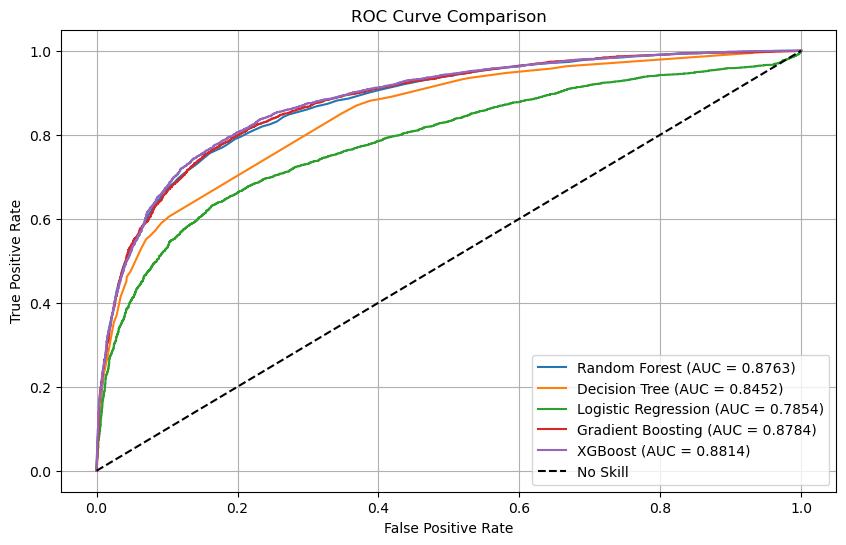

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# List to store ROC curve data
roc_data = []

# Random Forest
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
roc_data.append(('Random Forest', rf_fpr, rf_tpr, rf_auc))

# Decision Tree
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
roc_data.append(('Decision Tree', dt_fpr, dt_tpr, dt_auc))

# Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)
lr_probs = lr_model.predict_proba(X_test)[:, 1]
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
lr_auc = auc(lr_fpr, lr_tpr)
roc_data.append(('Logistic Regression', lr_fpr, lr_tpr, lr_auc))

# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_probs = gb_model.predict_proba(X_test)[:, 1]
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs)
gb_auc = auc(gb_fpr, gb_tpr)
roc_data.append(('Gradient Boosting', gb_fpr, gb_tpr, gb_auc))

# XGBoost
import xgboost as xgb
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)
xgb_auc = auc(xgb_fpr, xgb_tpr)
roc_data.append(('XGBoost', xgb_fpr, xgb_tpr, xgb_auc))

# Plot ROC curves
plt.figure(figsize=(10, 6))

for model_name, fpr, tpr, model_auc in roc_data:
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {model_auc:.4f})')

# Plot the diagonal (no-skill classifier)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')

plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [25]:
#According to the AUC Comparison, XGBoost's performance is better than others

In [26]:
#Hyperparameter Tuning
#GridSearchCV

from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# Perform grid search
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='roc_auc', verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and performance
print("Best Parameters:", grid_search.best_params_)
print("Best AUC:", grid_search.best_score_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.7

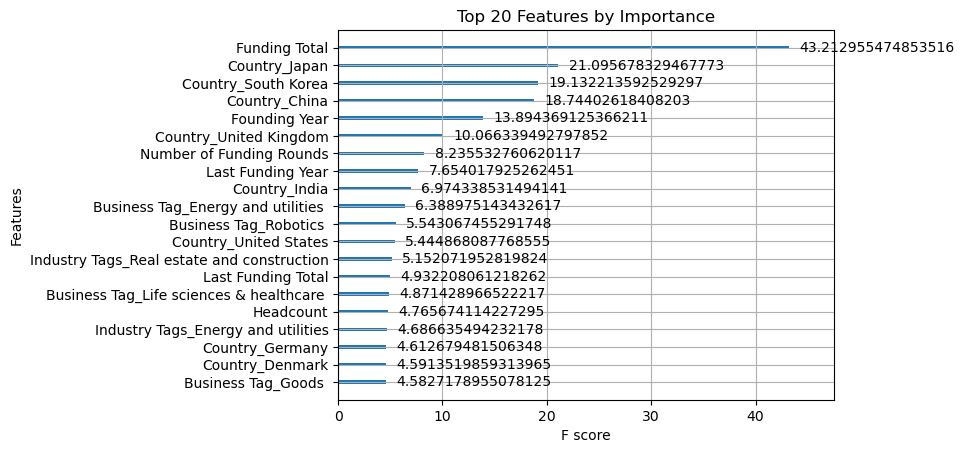

In [29]:
import matplotlib.pyplot as plt

# Plot feature importance
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb.plot_importance(xgb_model, importance_type='gain', max_num_features=20)
plt.title('Top 20 Features by Importance')
plt.show()

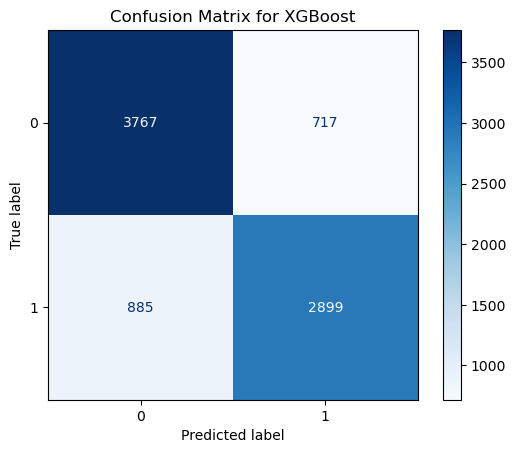

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Train XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for XGBoost')
plt.show()

In [31]:
tn, fp, fn, tp = cm.ravel()

accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")

Accuracy: 0.8062
Precision: 0.8017
Recall: 0.7661
F1 Score: 0.7835


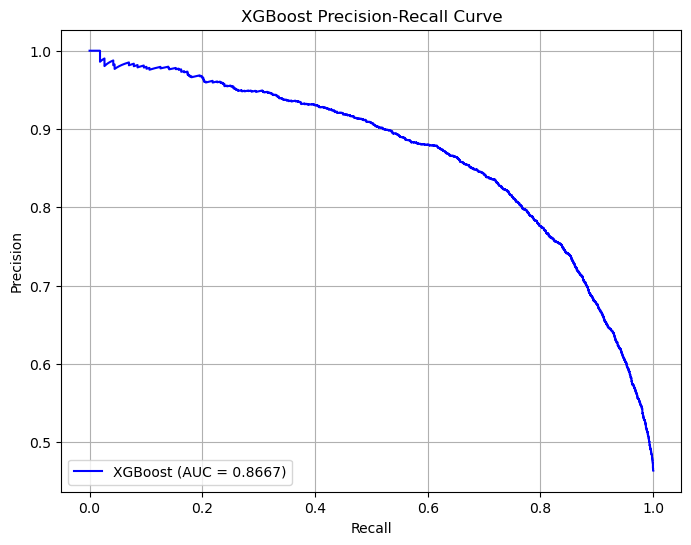

In [34]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for XGBoost
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]

# Calculate precision, recall, and thresholds
xgb_precision, xgb_recall, _ = precision_recall_curve(y_test, xgb_probs)

# Calculate AUC for the precision-recall curve
xgb_auc = auc(xgb_recall, xgb_precision)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(xgb_recall, xgb_precision, label=f'XGBoost (AUC = {xgb_auc:.4f})', color='blue')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('XGBoost Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid()
plt.show()